In [1]:
#imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [3]:
# example 1
en = 3
ch = 3
P = np.array([[.1, .2, .7],[.5, .3, .2],[.3, .3, .4]])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
R = np.array([8.,6.,4.])
tol = .3
print(P)
print(E)
print(R)
print(tol)

[[0.1 0.2 0.7]
 [0.5 0.3 0.2]
 [0.3 0.3 0.4]]
[[0.5 0.6 0.4]
 [0.2 0.3 0.1]
 [0.4 0.5 0.3]]
[8. 6. 4.]
0.3


In [4]:
# example 2
en = 5
ch = 4
P = np.array([[.35,.15,.05,.45],[.3,.3,.2,.2],[.3,.4,.1,.2],[.2,.15,.25,.4]])
E = np.array([[.4,.6,.4,.3],[.3,.4,.4,.3],[.3,.2,.1,.4],[.1,.35,.3,.4],[.2,.4,.1,.3]])
R = np.array([7.,5.5,4.,6.,5.])
tol = .35
print(P)
print(E)
print(R)
print(tol)

[[0.35 0.15 0.05 0.45]
 [0.3  0.3  0.2  0.2 ]
 [0.3  0.4  0.1  0.2 ]
 [0.2  0.15 0.25 0.4 ]]
[[0.4  0.6  0.4  0.3 ]
 [0.3  0.4  0.4  0.3 ]
 [0.3  0.2  0.1  0.4 ]
 [0.1  0.35 0.3  0.4 ]
 [0.2  0.4  0.1  0.3 ]]
[7.  5.5 4.  6.  5. ]
0.35


In [5]:
# example 2
en = 6
ch = 8
P = np.array([[.35,.2,.05,.45,.2,.15,.2,.4],[.3,.3,.2,.2,.35,.15,.05,.45],[.3,.15,.2,.25,.35,.45,.1,.2],[.35,.35,.2,.2,.2,.1,.2,.4],[.2,.15,.25,.4,.35,.15,.05,.45],[.2,.3,.2,.2,.2,.15,.3,.45],[.35,.15,.05,.45,.3,.4,.1,.2],[.2,.15,.25,.4,.4,.25,.15,.2]])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)

[[0.175 0.1   0.025 0.225 0.1   0.075 0.1   0.2  ]
 [0.15  0.15  0.1   0.1   0.175 0.075 0.025 0.225]
 [0.15  0.075 0.1   0.125 0.175 0.225 0.05  0.1  ]
 [0.175 0.175 0.1   0.1   0.1   0.05  0.1   0.2  ]
 [0.1   0.075 0.125 0.2   0.175 0.075 0.025 0.225]
 [0.1   0.15  0.1   0.1   0.1   0.075 0.15  0.225]
 [0.175 0.075 0.025 0.225 0.15  0.2   0.05  0.1  ]
 [0.1   0.075 0.125 0.2   0.2   0.125 0.075 0.1  ]]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2  ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2  ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15 ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.275 0.175]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05 ]]
[4.  3.5 4.  8.  2.  3. ]


In [6]:
ub = np.sum(E*steady_state_prob(P),axis=1)
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(min(ub))
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.13441032422422317
7.107371690867861 1.0 [0.] True 0.2
[0.         0.         0.22315708 0.77684292 0.         0.        ]


In [7]:
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x])) # noise to safe to avoid singular matrices, 1.0e-2 is working
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
temp_ch = [0]
for i in range(500):
    temp_ch.append(sample(P[temp_ch[-1]]))
    c_arr.append(1.0-bernoulli(E[sample(x0)][temp_ch[-1]]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

True
1.0
[0.5 0.  0.5 0.  0.  0. ]
0.154 4.0


In [8]:
# parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
S = 100
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = [0]; enc = [rd.randint(en)];chnl = [rd.randint(ch)]
avg_rate = []
# markov extra param
p = []
# p.append(row_normalize(np.random.rand(ch,ch)))
p.append(row_normalize(np.ones((ch,ch))))

In [9]:
# algo
w = 3.0
for t in range(1,5000):
    temp_b = []
    for s in range(S):
        enc.append(sample(x[-1].transpose()[0]))
        chnl.append(sample(P[chnl[-1]]))
        temp_b.append(int(bernoulli(E[enc[-1]][chnl[-1]])))
    b.append(np.mean(temp_b))
    # HMM
    model = hmm.MultinomialHMM(n_components=ch, params='t', init_params='',n_iter=100, tol=1.0e-2)
    model.startprob_ = steady_state_prob(p[-1])
    step_emiss = np.sum(x[-1]*E,axis=0)
    model.emissionprob_ = [[step_emiss[i],1-step_emiss[i]] for i in range(ch)]
    model.transmat_ = np.copy(p[-1])
    model.fit([temp_b]) #here
    p.append(((p[-1]*float(w*(t-1)))+model.transmat_)/float(w*t-w+1))
    ub = [np.sum(E*steady_state_prob(p[-1]),axis=1)]
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),round(np.sum(np.abs(P-p[-1]))*100/float(ch*ch),4),ltemp.success,end='\n')
error_plot_markov = 1.0 - np.copy(b)
for i in range(1,len(error_plot_markov)):
    error_plot_markov[i] += (error_plot_markov[i-1]*(i-1))
    error_plot_markov[i] =error_plot_markov[i]/i
rate_plot_markov = np.copy(avg_rate)
for i in range(1,len(rate_plot_markov)):
    rate_plot_markov[i] += (rate_plot_markov[i-1]*(i-1))
    rate_plot_markov[i] =rate_plot_markov[i]/i

1 7.19908 0.58 4.8455 True
2 7.20793 0.4467 4.8504 True
3 7.19036 0.3925 4.8439 True
4 7.19389 0.35 4.8443 True
5 7.19359 0.325 4.8443 True
6 7.19089 0.31 4.8439 True
7 7.19172 0.295 4.844 True
8 7.31543 0.2767 4.9671 True
9 7.31366 0.271 4.9661 True
10 7.31352 0.2655 4.966 True
11 7.29217 0.2633 4.9547 True
12 7.34195 0.2538 4.9957 True
13 7.3413 0.2507 4.9953 True
14 7.3427 0.2453 4.9961 True
15 7.34354 0.2412 4.9966 True
16 7.34477 0.2376 4.9974 True
17 7.34591 0.2344 4.9981 True
18 7.33313 0.2347 4.9912 True
19 7.34349 0.231 4.9981 True
20 7.34308 0.23 4.9979 True
21 7.33175 0.2305 4.9918 True
22 7.35813 0.2265 5.0137 True
23 7.35777 0.2258 5.0135 True
24 7.34824 0.2264 5.0083 True
25 7.34791 0.2262 5.0081 True
26 7.36264 0.2233 5.019 True
27 7.32092 0.2261 5.0042 True
28 7.31938 0.2262 5.0033 True
29 7.31981 0.2247 5.0035 True
30 7.31872 0.2248 5.0029 True
31 7.30597 0.2259 4.9965 True
32 7.30593 0.2252 4.9965 True
33 7.29917 0.2256 4.9928 True
34 7.31034 0.2234 5.0011 True
35 7.2

In [10]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = []; enc = [];chnl = [rd.randint(ch)]
avg_rate = []

In [11]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
sprob = steady_state_prob(p[-1])
tolx = tol
for t in range(1,5000):
    temp_b = []
    for s in range(S):
        enc.append(sample(x[-1].transpose()[0]))
        chnl.append(sample(P[chnl[-1]]))
        temp_b.append(int(bernoulli(E[enc[-1]][chnl[-1]])))
    b.append(np.mean(temp_b))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    val = alfa_c*betat*linalg.norm(xopt)
    if t > 100:
        tolx = 2.0*tol - np.mean(c)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tolx-val],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),round(np.sum(np.abs(P-p[-1]))*100/float(ch*ch),4),ltemp.success,end='\n')
error_plot_oplb = 1.0 - np.copy(b)
for i in range(1,len(error_plot_oplb)):
    error_plot_oplb[i] += (error_plot_oplb[i-1]*(i-1))
    error_plot_oplb[i] =error_plot_oplb[i]/i
rate_plot_oplb = np.copy(avg_rate)
for i in range(1,len(rate_plot_oplb)):
    rate_plot_oplb[i] += (rate_plot_oplb[i-1]*(i-1))
    rate_plot_oplb[i] =rate_plot_oplb[i]/i

1 8.0 0.14 5.1842 True
2 6.73704 0.22 5.1842 True
3 7.11239 0.1967 5.1842 True
4 7.09367 0.1975 5.1842 True
5 7.08092 0.198 5.1842 True
6 7.01443 0.2017 5.1842 True
7 6.93191 0.2057 5.1842 True
8 6.70138 0.2163 5.1842 True
9 6.79703 0.21 5.1842 True
10 6.74868 0.211 5.1842 True
11 6.7026 0.2118 5.1842 True
12 6.55519 0.2142 5.1842 True
13 6.62101 0.2146 5.1842 True
14 6.61447 0.2136 5.1842 True
15 6.67519 0.21 5.1842 True
16 6.6832 0.2088 5.1842 True
17 6.69076 0.2076 5.1842 True
18 6.6396 0.2094 5.1842 True
19 6.5589 0.2121 5.1842 True
20 6.40988 0.216 5.1842 True
21 6.46102 0.2138 5.1842 True
22 6.48522 0.2123 5.1842 True
23 6.48012 0.2117 5.1842 True
24 6.44944 0.2121 5.1842 True
25 6.44488 0.2116 5.1842 True
26 6.38761 0.2127 5.1842 True
27 6.29402 0.2126 5.1842 True
28 6.63306 0.2107 5.1842 True
29 6.31923 0.2121 5.1842 True
30 6.30053 0.2117 5.1842 True
31 6.37923 0.2126 5.1842 True
32 6.32793 0.2134 5.1842 True
33 6.34752 0.2164 5.1842 True
34 6.34419 0.2159 5.1842 True
35 6.328

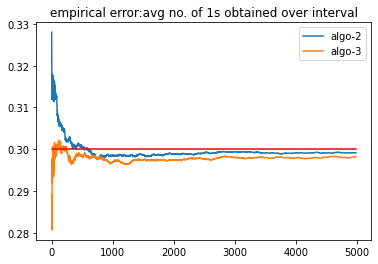

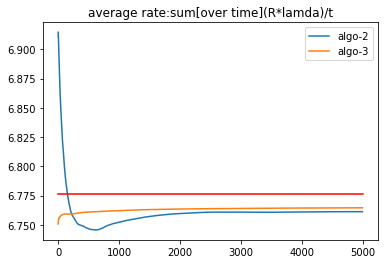

In [69]:
stat = 10 # 3,3
end = 5000
org_rate = dot(org_x,R)
plt.plot(error_plot_oplb[stat:end])
plt.plot(error_plot_markov[stat:end])
plt.plot([0,len(error_plot_oplb[stat:end])],[tol,tol],'r')
plt.legend(['algo-2', 'algo-3'])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
plt.plot(rate_plot_oplb[stat:end])
plt.plot(rate_plot_markov[stat:end])
plt.legend(['algo-2', 'algo-3'])
plt.plot([0,len(rate_plot_oplb[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

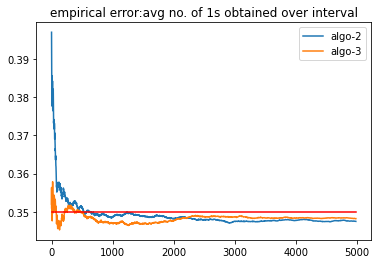

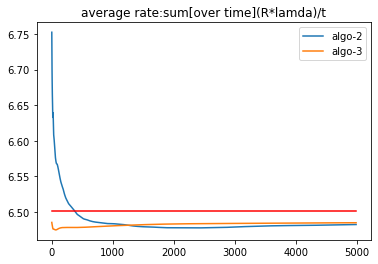

In [57]:
stat = 10 # 4,5
end = 5000
org_rate = dot(org_x,R)
plt.plot(error_plot_oplb[stat:end])
plt.plot(error_plot_markov[stat:end])
plt.plot([0,len(error_plot_oplb[stat:end])],[tol,tol],'r')
plt.legend(['algo-2', 'algo-3'])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
plt.plot(rate_plot_oplb[stat:end])
plt.plot(rate_plot_markov[stat:end])
plt.legend(['algo-2', 'algo-3'])
plt.plot([0,len(rate_plot_oplb[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

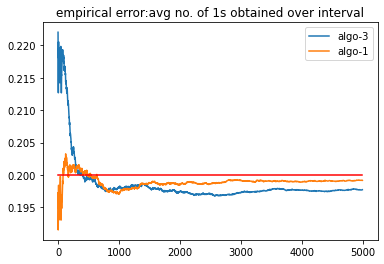

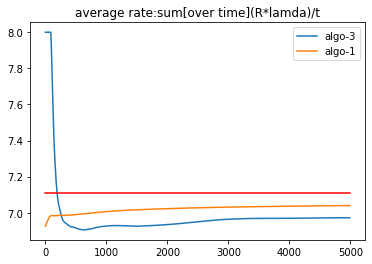

In [35]:
stat = 10 # 6,8
end = 5000
org_rate = dot(org_x,R)
plt.plot(error_plot_oplb[stat:end])
plt.plot(error_plot_markov[stat:end])
plt.plot([0,len(error_plot_oplb[stat:end])],[tol,tol],'r')
plt.legend(['algo-2', 'algo-3'])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
plt.plot(rate_plot_oplb[stat:end])
plt.plot(rate_plot_markov[stat:end])
plt.legend(['algo-2', 'algo-3'])
plt.plot([0,len(rate_plot_oplb[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [19]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
sprob = steady_state_prob(p[-1])
val = 1 - e0*np.sum(e0); val = np.array([[i for i in val.flatten()]])
gama = 1.0/float(2.0*en)
alfa_c = alfa_c/math.sqrt(float(en))
for t in range(1,5000):
    temp_b = []
    for s in range(S):
        enc.append(sample(x[-1].transpose()[0]))
        chnl.append(sample(P[chnl[-1]]))
        temp_b.append(int(bernoulli(E[enc[-1]][chnl[-1]])))
    b.append(np.mean(temp_b))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    # print(np.mean(ub),alfa_c*betat*np.mean(val),tol+(alfa_c*betat*err))
    alfact = alfa_c # /math.pow(float(t),0.5)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub + alfact*betat*val, b_ub = [tol+(alfact*betat*gama)],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),round(np.sum(np.abs(P-p[-1]))*100/float(ch*ch),4),ltemp.success,end='\n')
error_plot_oplb = 1.0 - np.copy(b)
for i in range(1,len(error_plot_oplb)):
    error_plot_oplb[i] += (error_plot_oplb[i-1]*(i-1))
    error_plot_oplb[i] =error_plot_oplb[i]/i
rate_plot_oplb = np.copy(avg_rate)
for i in range(1,len(rate_plot_oplb)):
    rate_plot_oplb[i] += (rate_plot_oplb[i-1]*(i-1))
    rate_plot_oplb[i] =rate_plot_oplb[i]/i

1 8.0 0.575 4.8437 True
2 5.06462 0.47 4.8437 True
3 5.48781 0.4075 4.8437 True
4 5.18183 0.366 4.8437 True
5 5.27396 0.3283 4.8437 True
6 5.29302 0.3029 4.8437 True
7 5.17845 0.29 4.8437 True
8 5.24186 0.2722 4.8437 True
9 5.1987 0.263 4.8437 True
10 5.19514 0.2536 4.8437 True
11 5.17762 0.2467 4.8437 True
12 5.17537 0.24 4.8437 True
13 5.12634 0.2371 4.8437 True
14 5.10478 0.2333 4.8437 True
15 5.07526 0.2306 4.8437 True
16 5.0874 0.2259 4.8437 True
17 5.09785 0.2217 4.8437 True
18 5.09061 0.2189 4.8437 True
19 5.09936 0.2155 4.8437 True
20 5.07097 0.2148 4.8437 True
21 5.0863 0.2114 4.8437 True
22 5.10001 0.2083 4.8437 True
23 5.08195 0.2075 4.8437 True
24 5.07682 0.206 4.8437 True
25 5.08883 0.2035 4.8437 True
26 5.09979 0.2011 4.8437 True
27 5.07956 0.2011 4.8437 True
28 5.08497 0.1993 4.8437 True
29 5.0993 0.197 4.8437 True
30 5.08129 0.1971 4.8437 True
31 5.0816 0.1959 4.8437 True
32 5.10689 0.193 4.8437 True
33 5.11845 0.1912 4.8437 True
34 5.12927 0.1894 4.8437 True
35 5.12482

In [30]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = []; enc = [];chnl = [rd.randint(ch)]
avg_rate = []

In [43]:
print(x0.flatten())
print('--------------------------------------------------------------------------')
print(x[end-2].flatten())
print(org_x)
print(error_plot[end-2],tol)
print(rate_plot[end-2],avg_rate[end-2],dot(org_x,R))

[0. 1. 0.]
--------------------------------------------------------------------------
[0.37015758 0.62984242 0.        ]
[0.38797814 0.61202186 0.        ]
0.29549819927969984 0.3
6.7430804924438705 6.7402218101161235 6.775956284153006


4.843749999999999 4.843749999999999


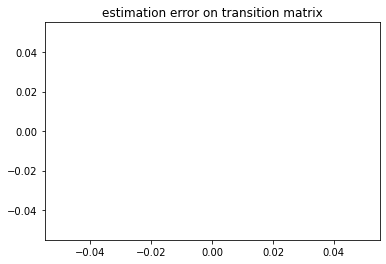

In [21]:
err = [] # 3,3
for i in range(len(p)):
    err.append(np.sum(np.abs(P-p[i]))*100/float(ch*ch))
print(err[0], err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on transition matrix')
plt.show()

In [57]:
# Rough